

  # Loan data from Lending Club

# Import Libraries

In [ ]:
# !pip install dython
# !pip install numpy>=1.23.0
# !pip install --upgrade numpy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from dython.nominal import associations


from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

print('OK')

OK


 # Loading Data

In [ ]:
#Read and write to excel
dataLoan =  pd.read_csv(r'loans_full_schema.csv')
dataLoan.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,18-Mar,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,18-Feb,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,18-Feb,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,18-Jan,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,18-Mar,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,18-Jan,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,18-Jan,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,18-Jan,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,18-Feb,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,18-Mar,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


# Preprocessing

## 1. Clean data

In [ ]:
#Check the data formatting of columns
dataLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [ ]:
# Count the missing values
dataLoan.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [ ]:
# Remove columns 'months_since_last_delinq' and 'months_since_90d_late'
dataLoan = dataLoan.drop(['annual_income_joint', 'verification_income_joint','debt_to_income_joint', 'emp_title',
                          'num_accounts_120d_past_due', 'months_since_last_delinq', 'months_since_90d_late'], axis=1)


In [ ]:
# Convert NA values to mean values of the columns: emp_length, months_since_last_credit_inquiry
dataLoan = dataLoan.fillna(dataLoan.mean())

<ipython-input-61-89917df6132b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataLoan = dataLoan.fillna(dataLoan.mean())


In [ ]:
dataLoan.describe()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,0.21600,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.549197,6.473429e+04,14.986833,0.68366,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,0.00000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.500000e+04,11.067500,0.00000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,5.930306,6.500000e+04,17.600000,0.00000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,24.990000,0.00000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,13.00000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443680,40000.000000,4216.440000,52.980000


## 2. Feature Selection

In [ ]:
# Check the correlation between numeric variables with interest_rate variable
corr_interest_rate = dataLoan[dataLoan.columns[:]].corr()['interest_rate'][:]
corr_interest_rate

<ipython-input-63-90f605a61ce8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_interest_rate = dataLoan[dataLoan.columns[:]].corr()['interest_rate'][:]


emp_length                         -0.028405
annual_income                      -0.099584
debt_to_income                      0.141393
delinq_2y                           0.090456
earliest_credit_line                0.103635
inquiries_last_12m                  0.131193
total_credit_lines                 -0.044435
open_credit_lines                  -0.012773
total_credit_limit                 -0.130497
total_credit_utilized               0.031527
num_collections_last_12m            0.029901
num_historical_failed_to_pay        0.037563
current_accounts_delinq             0.007184
total_collection_amount_ever        0.013532
current_installment_accounts        0.047131
accounts_opened_24m                 0.120657
months_since_last_credit_inquiry   -0.094503
num_satisfactory_accounts          -0.013330
num_accounts_30d_past_due           0.007184
num_active_debit_accounts           0.026800
total_debit_limit                  -0.254225
num_total_cc_accounts              -0.071238
num_open_c

In [ ]:
# Get the numeric columns
num_cols = dataLoan._get_numeric_data().columns

# Get the categorical columns
cat_cols = set(dataLoan.columns) - set(num_cols)

# Convert the set to a list and print the categorical columns
cat_cols_list = list(cat_cols)
print(cat_cols_list)

['loan_purpose', 'loan_status', 'application_type', 'grade', 'sub_grade', 'state', 'verified_income', 'homeownership', 'issue_month', 'disbursement_method', 'initial_listing_status']


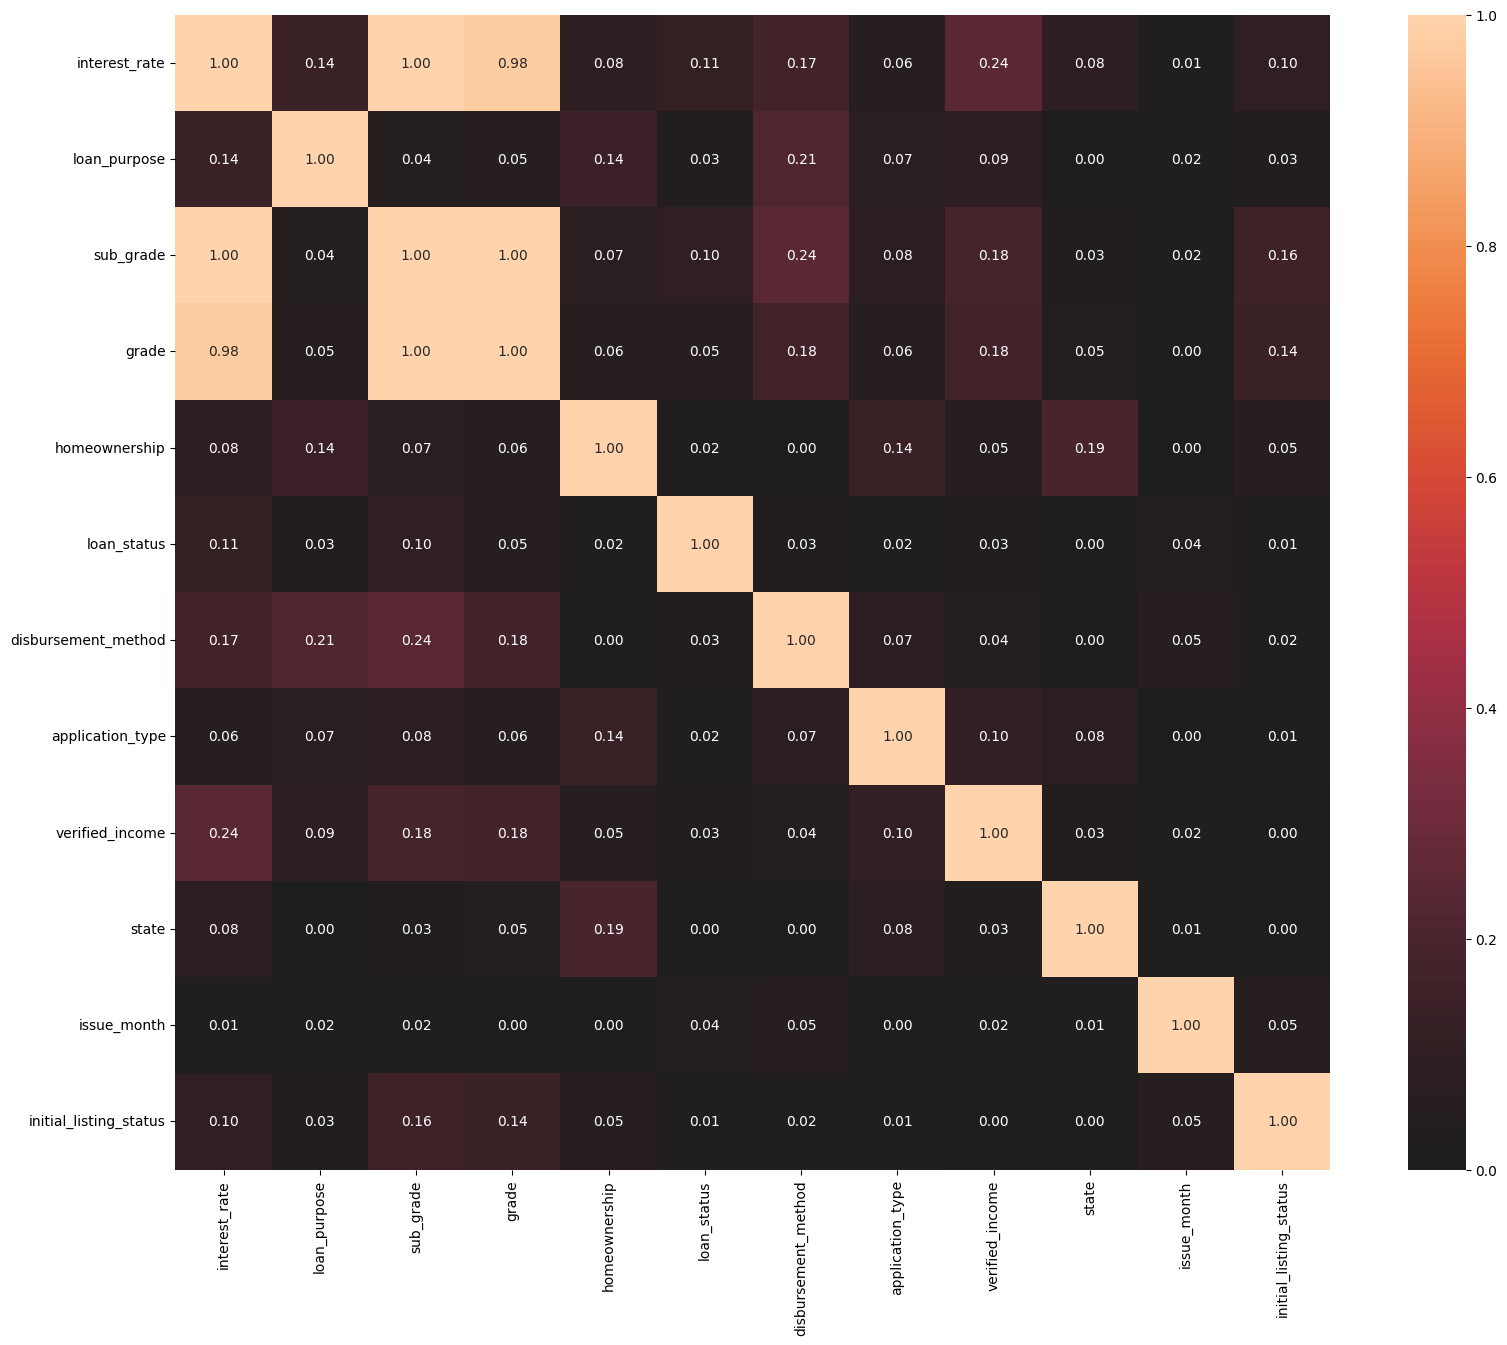

{'corr':                         interest_rate  loan_purpose  sub_grade     grade  \
 interest_rate                1.000000      0.138838   0.999188  0.975167   
 loan_purpose                 0.138838      1.000000   0.042337  0.052529   
 sub_grade                    0.999188      0.042337   1.000000  0.998748   
 grade                        0.975167      0.052529   0.998748  1.000000   
 homeownership                0.080557      0.142468   0.065262  0.056599   
 loan_status                  0.111421      0.031187   0.097566  0.052294   
 disbursement_method          0.168792      0.214087   0.243195  0.177153   
 application_type             0.061201      0.068028   0.075266  0.060558   
 verified_income              0.243823      0.090274   0.183005  0.175920   
 state                        0.079026      0.000000   0.029257  0.046657   
 issue_month                  0.011122      0.021637   0.023404  0.000000   
 initial_listing_status       0.100040      0.027459   0.160665  0.1

In [ ]:
associations(dataLoan[['interest_rate','loan_purpose', 'sub_grade', 'grade', 'homeownership',
                       'loan_status', 'disbursement_method', 'application_type',
                       'verified_income', 'state', 'issue_month', 'initial_listing_status']],figsize=(20,15))

In [ ]:
# Select numberical variables that are correlated with the variable 'interest_rate' >= 0.5 and <= -0.5. Total of 16 columns
dataLoan = dataLoan[['interest_rate', 'grade','sub_grade','paid_interest',
                     'emp_length','annual_income','total_credit_lines','open_credit_lines','total_credit_limit',
                     'months_since_last_credit_inquiry','num_satisfactory_accounts','total_debit_limit','num_total_cc_accounts','num_open_cc_accounts',
                     'num_mort_accounts','account_never_delinq_percent','paid_principal']]
dataLoan.head(6)

,interest_rate,grade,sub_grade,paid_interest,emp_length,annual_income,total_credit_lines,open_credit_lines,total_credit_limit,months_since_last_credit_inquiry,num_satisfactory_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_mort_accounts,account_never_delinq_percent,paid_principal
0,14.07,C,C3,1015.19,3.000000,90000.0,28,10,70795,5.0,10,11100,14,8,1,92.9,984.14
1,12.61,C,C1,150.49,10.000000,40000.0,30,14,28800,8.0,14,16500,24,14,0,100.0,348.63
2,17.09,D,D1,106.43,3.000000,40000.0,31,10,24193,7.0,10,4300,14,8,0,93.5,175.37
3,6.72,A,A3,566.15,1.000000,30000.0,4,4,25400,15.0,4,19400,3,3,0,100.0,2746.74
4,14.07,C,C3,754.80,10.000000,35000.0,22,16,69839,4.0,16,32700,20,15,0,100.0,1569.85
5,6.72,A,A3,129.84,5.930306,34000.0,32,12,42100,5.0,12,27200,27,12,3,78.1,743.29


## Feature Transformation

### Ordinal Encoding

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
dataLoan[['grade', 'sub_grade']] = dataLoan[['grade', 'sub_grade']].apply(LabelEncoder().fit_transform)


<ipython-input-68-d5fe2c609322>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataLoan[['grade', 'sub_grade']] = dataLoan[['grade', 'sub_grade']].apply(LabelEncoder().fit_transform)


In [ ]:

#%% Create the groups base on interest rate
dataLoan['interest_rate']  = dataLoan['interest_rate'].apply(lambda x: 'A' if x <= 7.97 else 'B' if x <= 11.99
                                                               else 'C' if x <= 16.1 else 'D' if x <= 21.85
                                                               else 'E' if x <= 26.77 else 'F' if x <= 30.75
                                                               else 'G')

#%% Encode the grouped_interest variable
labelEncoder = LabelEncoder()
dataLoan['interest_rate'] = labelEncoder.fit_transform(dataLoan['interest_rate'].values)

dataLoan['interest_rate'].value_counts()


<ipython-input-69-f100ca973ac2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataLoan['interest_rate']  = dataLoan['interest_rate'].apply(lambda x: 'A' if x <= 7.97 else 'B' if x <= 11.99
<ipython-input-69-f100ca973ac2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataLoan['interest_rate'] = labelEncoder.fit_transform(dataLoan['interest_rate'].values)


1    3037
2    2653
0    2461
3    1444
4     335
5      58
6      12
Name: interest_rate, dtype: int64

## Feature Scaling

### Normalization

In [ ]:

for column in dataLoan.columns:
    dataLoan['paid_interest'] = (dataLoan['paid_interest'] - dataLoan['paid_interest'].min()) \
                                / (dataLoan['paid_interest'].max() - dataLoan['paid_interest'].min())


    dataLoan['emp_length'] = (dataLoan['emp_length'] - dataLoan['emp_length'].min()) \
                                / (dataLoan['emp_length'].max() - dataLoan['emp_length'].min())


    dataLoan['total_credit_lines'] = (dataLoan['total_credit_lines'] - dataLoan['total_credit_lines'].min()) \
                                / (dataLoan['total_credit_lines'].max() - dataLoan['total_credit_lines'].min())


    dataLoan['open_credit_lines'] = (dataLoan['open_credit_lines'] - dataLoan['open_credit_lines'].min()) \
                                / (dataLoan['open_credit_lines'].max() - dataLoan['open_credit_lines'].min())


    dataLoan['total_credit_limit'] = (dataLoan['total_credit_limit'] - dataLoan['total_credit_limit'].min()) \
                                / (dataLoan['total_credit_limit'].max() - dataLoan['total_credit_limit'].min())


    dataLoan['months_since_last_credit_inquiry'] = (dataLoan['months_since_last_credit_inquiry'] - dataLoan['months_since_last_credit_inquiry'].min()) \
                                / (dataLoan['months_since_last_credit_inquiry'].max() - dataLoan['months_since_last_credit_inquiry'].min())


    dataLoan['num_satisfactory_accounts'] = (dataLoan['num_satisfactory_accounts'] - dataLoan['num_satisfactory_accounts'].min()) \
                                / (dataLoan['num_satisfactory_accounts'].max() - dataLoan['num_satisfactory_accounts'].min())


    dataLoan['total_debit_limit'] = (dataLoan['total_debit_limit'] - dataLoan['total_debit_limit'].min()) \
                                / (dataLoan['total_debit_limit'].max() - dataLoan['total_debit_limit'].min())


    dataLoan['num_total_cc_accounts'] = (dataLoan['num_total_cc_accounts'] - dataLoan['num_total_cc_accounts'].min()) \
                                / (dataLoan['num_total_cc_accounts'].max() - dataLoan['num_total_cc_accounts'].min())


    dataLoan['num_open_cc_accounts'] = (dataLoan['num_open_cc_accounts'] - dataLoan['num_open_cc_accounts'].min()) \
                                / (dataLoan['num_open_cc_accounts'].max() - dataLoan['num_open_cc_accounts'].min())


    dataLoan['num_mort_accounts'] = (dataLoan['num_mort_accounts'] - dataLoan['num_mort_accounts'].min()) \
                                / (dataLoan['num_mort_accounts'].max() - dataLoan['num_mort_accounts'].min())


    dataLoan['account_never_delinq_percent'] = (dataLoan['account_never_delinq_percent'] - dataLoan['account_never_delinq_percent'].min()) \
                                / (dataLoan['account_never_delinq_percent'].max() - dataLoan['account_never_delinq_percent'].min())


    dataLoan['paid_principal'] = (dataLoan['paid_principal'] - dataLoan['paid_principal'].min()) \
                                / (dataLoan['paid_principal'].max() - dataLoan['paid_principal'].min())

<ipython-input-70-fde4c92a5cb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataLoan['paid_interest'] = (dataLoan['paid_interest'] - dataLoan['paid_interest'].min()) \


In [ ]:
dataLoan.head()


,interest_rate,grade,sub_grade,paid_interest,emp_length,annual_income,total_credit_lines,open_credit_lines,total_credit_limit,months_since_last_credit_inquiry,num_satisfactory_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_mort_accounts,account_never_delinq_percent,paid_principal
0,2,2,12,0.240769,0.3,90000.0,0.305882,0.196078,0.020908,0.208333,0.196078,0.028704,0.187500,0.173913,0.071429,0.917153,0.024604
1,2,2,10,0.035691,1.0,40000.0,0.329412,0.274510,0.008506,0.333333,0.274510,0.042669,0.343750,0.304348,0.000000,1.000000,0.008716
2,3,3,15,0.025242,0.3,40000.0,0.341176,0.196078,0.007145,0.291667,0.196078,0.011120,0.187500,0.173913,0.000000,0.924154,0.004384
3,0,0,2,0.134272,0.1,30000.0,0.023529,0.078431,0.007501,0.625000,0.078431,0.050168,0.015625,0.065217,0.000000,1.000000,0.068668
4,2,2,12,0.179014,1.0,35000.0,0.235294,0.313725,0.020626,0.166667,0.313725,0.084562,0.281250,0.326087,0.000000,1.000000,0.039246


## Split train_test

In [ ]:

#%% Define X,y
y = dataLoan['interest_rate']
X = dataLoan.drop('interest_rate',axis=1)
X_backUp = X


In [ ]:

#%% split_train_test
train_test_split = 0.7
train_len = int(len(dataLoan)*train_test_split)
X_train = X[:train_len]
X_test = X[train_len:]
y_train = y[:train_len]
y_test = y[train_len:]



In [ ]:
print(X_test.shape)

(3000, 16)


# Build model

## The classification metrics

In [ ]:
#%% Function for displaying Classifier results
def display_statistic(model_name,expected_y, preds):
    print(metrics.classification_report(expected_y, preds))
    cm = metrics.confusion_matrix(expected_y, preds)
    print(model_name,"CLASSIFIER ACCURACY: ",metrics.accuracy_score(expected_y,preds))
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

## The classification algorithms

###1. Random Forest

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       725
           B       1.00      1.00      1.00       942
           C       1.00      1.00      1.00       766
           D       1.00      1.00      1.00       428
           E       1.00      1.00      1.00       113
           F       1.00      1.00      1.00        25
           G       1.00      1.00      1.00         1

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

RANDOM FOREST CLASSIFIER ACCURACY:  0.9996666666666667


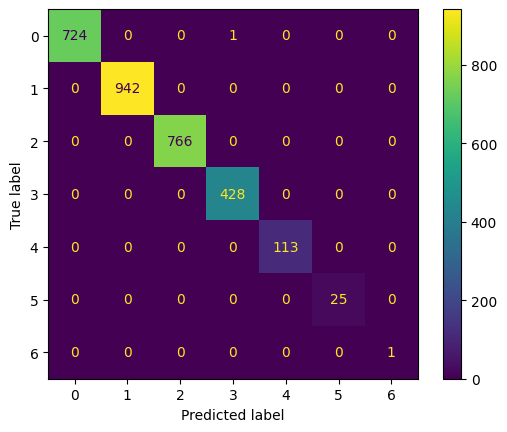

In [ ]:
#%%
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
display_statistic('RANDOM FOREST',labelEncoder.inverse_transform(y_test),labelEncoder.inverse_transform(rf_pred))

###2. Support Vector Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.30      0.10      0.16       725
           B       0.31      0.91      0.47       942
           C       0.00      0.00      0.00       766
           D       0.00      0.00      0.00       428
           E       0.00      0.00      0.00       113
           F       0.00      0.00      0.00        25
           G       0.00      0.00      0.00         1

    accuracy                           0.31      3000
   macro avg       0.09      0.15      0.09      3000
weighted avg       0.17      0.31      0.18      3000

SVC CLASSIFIER ACCURACY:  0.31133333333333335


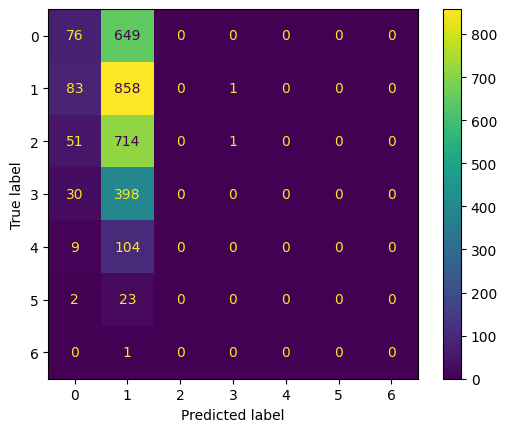

In [ ]:
#%%
sv = SVC()
sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)
display_statistic('SVC',labelEncoder.inverse_transform(y_test),labelEncoder.inverse_transform(sv_pred))

###3. K-nearest Neighbors

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.68      0.69      0.69       725
           B       0.62      0.76      0.68       942
           C       0.63      0.73      0.68       766
           D       0.68      0.36      0.47       428
           E       0.00      0.00      0.00       113
           F       0.00      0.00      0.00        25
           G       0.00      0.00      0.00         1

    accuracy                           0.64      3000
   macro avg       0.37      0.36      0.36      3000
weighted avg       0.62      0.64      0.62      3000

KNN CLASSIFIER ACCURACY:  0.6443333333333333


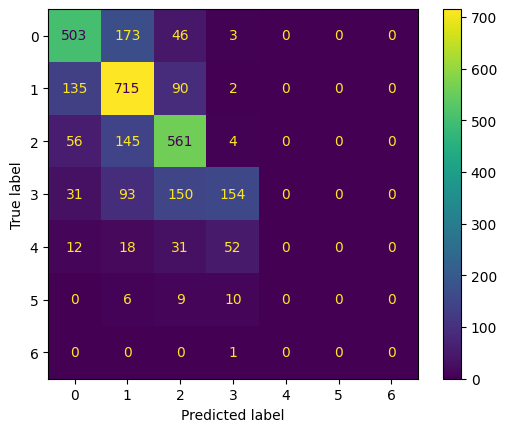

In [ ]:
#%%
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
display_statistic('KNN',labelEncoder.inverse_transform(y_test),labelEncoder.inverse_transform(knn_pred))

###4. XGBoost

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       725
           B       1.00      1.00      1.00       942
           C       1.00      1.00      1.00       766
           D       1.00      1.00      1.00       428
           E       1.00      1.00      1.00       113
           F       1.00      1.00      1.00        25
           G       1.00      1.00      1.00         1

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

XGBOOST CLASSIFIER ACCURACY:  0.9996666666666667


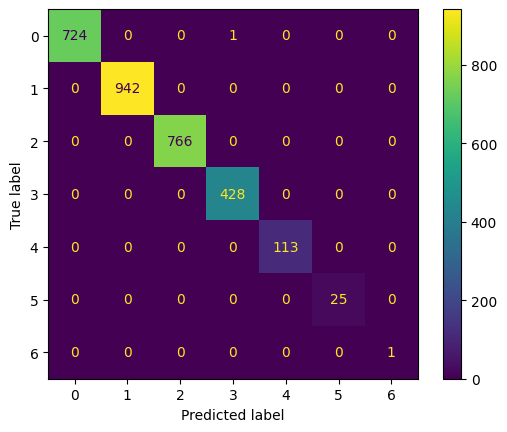

In [ ]:
#%%
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
xg_pred = model.predict(X_test)
display_statistic('XGBOOST',labelEncoder.inverse_transform(y_test),labelEncoder.inverse_transform(xg_pred))

###5. Decision Tree

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       725
           B       1.00      1.00      1.00       942
           C       1.00      1.00      1.00       766
           D       1.00      1.00      1.00       428
           E       1.00      1.00      1.00       113
           F       1.00      1.00      1.00        25
           G       1.00      1.00      1.00         1

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Decision Tree CLASSIFIER ACCURACY:  0.9993333333333333


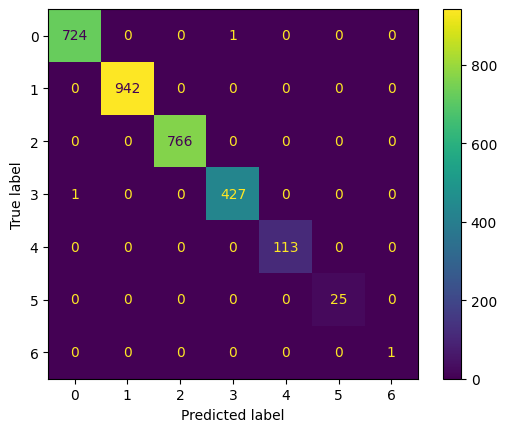

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
display_statistic('Decision Tree',labelEncoder.inverse_transform(y_test),labelEncoder.inverse_transform(dt_pred))

# Evaluate

In [1]:
import pandas as pd
from IPython.display import display, HTML

# Create a dataframe
data = {
    'MODEL': ['RF', 'SVC', 'KNN', 'XGBoost', 'DT'],
    'ACCURACY': [0.999, 0.311, 0.644, 0.999, 0.999],
    'macro_avg(precision)': [1.00, 0.09, 0.37, 1.00, 1.005],
    'macro_avg(recall)': [1.00, 0.15, 0.36, 1.00, 1.00],
    'macro_avg(f1-score)': [1.00, 0.09, 0.36, 1.00, 1.00]
}

df = pd.DataFrame(data)

# Define a function to set background color based on condition for each feature
def background_color_accuracy(value):
    if value == df['ACCURACY'].max():
        return 'background-color: yellow'
    else:
        return ''

def background_color_precision(value):
    if value == df['macro_avg(precision)'].max():
        return 'background-color: lime'
    else:
        return ''

def background_color_recall(value):
    if value == df['macro_avg(recall)'].max():
        return 'background-color: yellow'
    else:
        return ''

def background_color_f1_score(value):
    if value == df['macro_avg(f1-score)'].max():
        return 'background-color: lime'
    else:
        return ''

# Apply background color to specific features
styled_df = df.style.applymap(background_color_accuracy, subset=['ACCURACY'])
styled_df = styled_df.applymap(background_color_precision, subset=['macro_avg(precision)'])
styled_df = styled_df.applymap(background_color_recall, subset=['macro_avg(recall)'])
styled_df = styled_df.applymap(background_color_f1_score, subset=['macro_avg(f1-score)'])

# Set the style to center-align the values in all columns
styled_df.set_table_styles([
    {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '20 px'), ('border', '1px solid #ddd')]}
])

# Display the styled dataframe with centered values and background colors for specific features
styled_df

,MODEL,ACCURACY,macro_avg(precision),macro_avg(recall),macro_avg(f1-score)
0,RF,0.999000,1.000000,1.000000,1.000000
1,SVC,0.311000,0.090000,0.150000,0.090000
2,KNN,0.644000,0.370000,0.360000,0.360000
3,XGBoost,0.999000,1.000000,1.000000,1.000000
4,DT,0.999000,1.005000,1.000000,1.000000


**Conclude:** above are 4 measures showing the percentage used to evaluate the performance of 5 algorithms and generally the closer to 1 will bring high accuracy:
- Accuracy: we see that, the highest accuracy belongs to 3 algorithms RF, XGBoost, DT with the same rate of 99.9%.
- macro_avg(precision), macro_avg(recall), macro_avg(f1-score): we see that RF, XGBoost, DT have absolute accuracy up to 100%.
- From the above measures, we have 3 algorithms used to train the data in this dataset, which are RF, XGBoost and DT.